In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # 1st tuple training input with output  & 2nd tuple training input with output

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train.shape

(60000,)

8


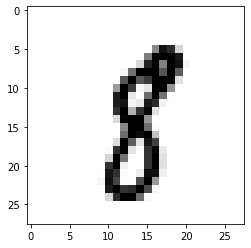

In [ ]:

import matplotlib.pyplot as plt
image_index = 300
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [ ]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(input_shape)))#default s=1
model.add(MaxPooling2D(pool_size=(2, 2)))#default s=2
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten()) # Flattening the 3D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))#<---- 1st hideen layer
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))#<-----output layer

Using TensorFlow backend.


NameError: ignored

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [ ]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) #configures the model
model.fit(x=x_train,y=y_train, epochs=10)#-> forward+backward

Epoch 1/10
60000/60000 [==============================] - 58s 960us/step - loss: 0.1482 - accuracy: 0.9538
Epoch 2/10
60000/60000 [==============================] - 58s 962us/step - loss: 0.0489 - accuracy: 0.9845
Epoch 3/10
60000/60000 [==============================] - 58s 958us/step - loss: 0.0350 - accuracy: 0.9889
Epoch 4/10
60000/60000 [==============================] - 58s 961us/step - loss: 0.0275 - accuracy: 0.9915
Epoch 5/10
60000/60000 [==============================] - 58s 962us/step - loss: 0.0217 - accuracy: 0.9932
Epoch 6/10
60000/60000 [==============================] - 58s 964us/step - loss: 0.0185 - accuracy: 0.9942
Epoch 7/10
60000/60000 [==============================] - 59s 984us/step - loss: 0.0164 - accuracy: 0.9948
Epoch 8/10
60000/60000 [==============================] - 58s 971us/step - loss: 0.0131 - accuracy: 0.9957
Epoch 9/10
60000/60000 [==============================] - 58s 969us/step - loss: 0.0115 - accuracy: 0.9962
Epoch 10/10
60000/60000 [============

In [ ]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 3s 291us/step


[0.04129408776975033, 0.9904]

In [ ]:
x_test[9999].shape

(28, 28, 1)

3


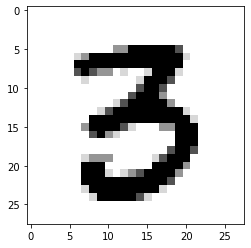

In [ ]:
#testing

image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28,28, 1))
print(pred.argmax())

In [ ]:
pred

array([[3.8081482e-11, 1.4561318e-12, 1.0826488e-11, 9.3941445e-13,
        1.2309394e-10, 9.5872011e-08, 9.9999988e-01, 1.6532794e-17,
        1.1280017e-10, 2.0473584e-12]], dtype=float32)